**실습 문제**

In [44]:
!sudo apt-get install -y fonts-nanum#폰트 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,348 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

1.1) 붓꽃 데이터 읽어와서 확인

In [1]:
#붓꽃 파일 가져오기
import pandas as pd
filename='/content/drive/MyDrive/Colab Notebooks/iris.csv'
iris=pd.read_csv(filename)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
iris.info()#데이터 기본 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris.describe()#기초통계량 확인

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
count=pd.DataFrame(iris['Species'].value_counts())#품종별 개수
count

,count
Species,
setosa,50
versicolor,50
virginica,50


1.2) 붓꽃 데이터 전처리

In [5]:
iris.isnull().sum()#결측치 확인

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [6]:
iris.duplicated().sum()#중복값 확인

1

In [7]:
index=iris.duplicated()#여기에 저장되는건 뭔가?
iris.loc[index,:]#중복 데이터 확인

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
142,5.8,2.7,5.1,1.9,virginica


In [8]:
result=(iris['SepalLength']==5.8)&(iris['PetalWidth']==1.9)#중복된 데이터 모두 확인
iris.loc[result,:]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [9]:
iris=iris.drop_duplicates()#중복데이터 삭제
print(iris.duplicated().sum())
result=(iris['PetalLength']==5.1)&(iris['PetalWidth']==1.9)
iris.loc[result,:]

0


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica


1.3) 붓꽃 데이터 그룹핑

In [10]:
print(iris.groupby('Species').sum())#품종기준으로 합계구하기
print(iris.value_counts('Species'))

            SepalLength  SepalWidth  PetalLength  PetalWidth
Species                                                     
setosa            250.3       171.4         73.1        12.3
versicolor        296.8       138.5        213.0        66.3
virginica         323.6       146.0        272.5        99.4
Species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64


In [11]:
iris.groupby('Species').mean()#품종기준으로 평균구하기

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


In [12]:
from sklearn.datasets import load_iris #사이킷런 패키지의 붓꽃 데이터
iris_dataset=load_iris()#함수로 불러올 수 있다.
iris_dataset.keys()
df=pd.DataFrame(iris_dataset['data'],columns=iris_dataset['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
import seaborn as sns#seaborn 모듈도 데이터 셋을 내장하고있다.
df=sns.load_dataset('iris')#힘수로 불러올 수 있다.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1.4) 판다스의 데이터 시각화
- 판다스의 시리즈 데이터 프레임은 'plot'이라는 시각화 메소드를 내장하고 있다.
- plot은 matplotlib을 내부에서 import하여 사용한다.
- plot 메소드의 kind라는 인수를 바꾸면 여러 가지 플롯을 그릴 수 있다.
  - line, bar(수직 막대그래프), barh(수평 막대 그래프), his(히스토그램 그래프), box(박스 그래프)

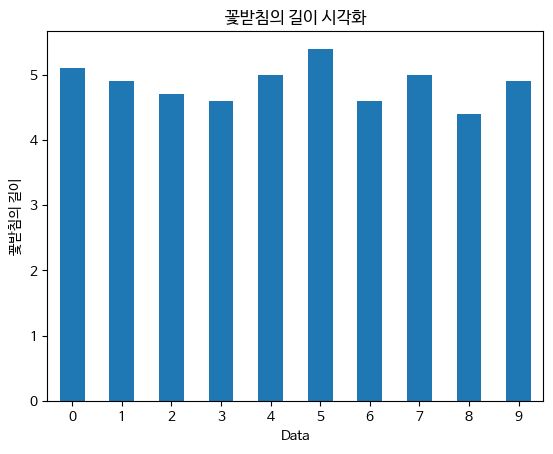

In [15]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)
iris.SepalLength[:10].plot(kind='bar',rot=0)
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이")
plt.show()

In [16]:
df2=iris.groupby(iris['Species']).mean()
df2

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


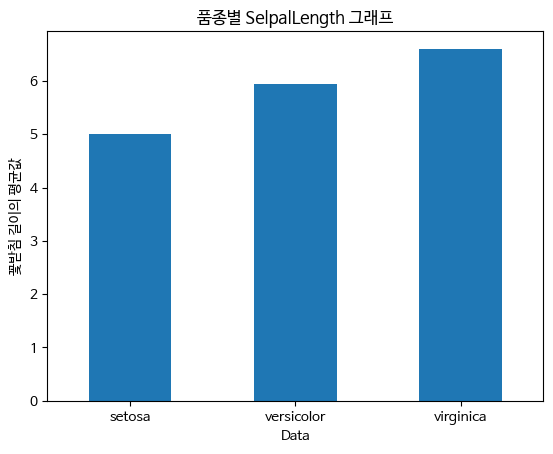

In [31]:
df2.SepalLength[:].plot(kind='bar',rot=0)
plt.title('품종별 SelpalLength 그래프')
plt.xlabel('Data')
plt.ylabel('꽃받침 길이의 평균값')
plt.show()

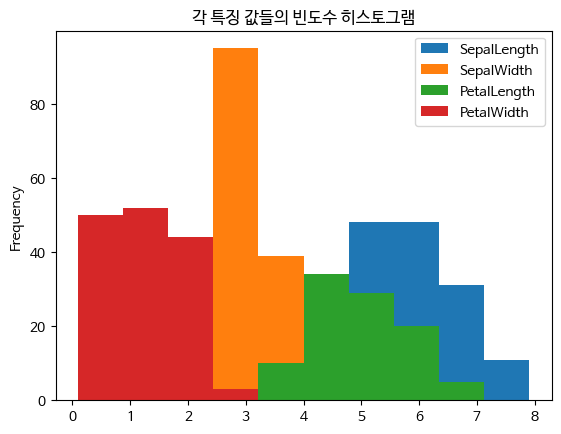

In [23]:
iris.plot(kind='hist')
plt.title('각 특징 값들의 빈도수 히스토그램')
plt.show()

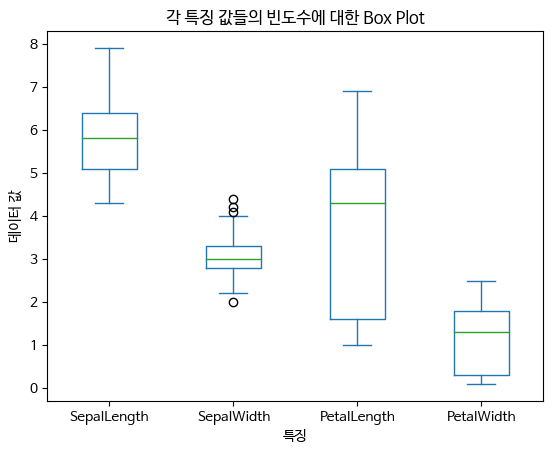

In [25]:
iris.plot(kind='box')
plt.title('각 특징 값들의 빈도수에 대한 Box Plot')
plt.xlabel('특징')
plt.ylabel('데이터 값')
plt.show()

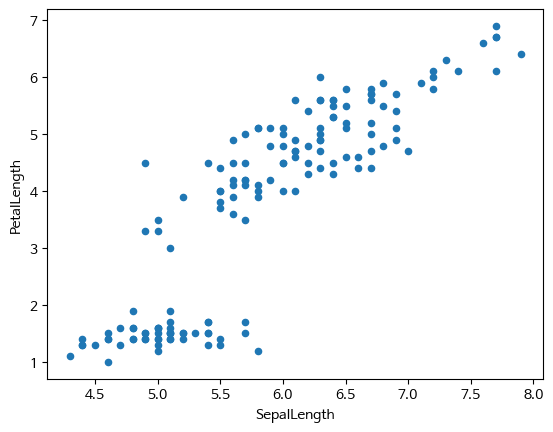

In [26]:
iris.plot(x='SepalLength',y='PetalLength' ,kind='scatter')
plt.show()

2.1) 타이타닉 데이터 읽어와서 확인

In [32]:
titanic=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
titanic.sort_values('Fare',ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [39]:
pd.DataFrame(titanic['Survived'].value_counts())#생존자별 인원수 확인

,count
Survived,
0,549
1,342


2.2) 타이타닉 데이터 전처리

In [40]:
titanic.isnull().sum()#결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
titanic.drop(['Cabin'],axis=1,inplace=True)#Cabin 열 삭제
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [43]:
titanic['Embarked'].value_counts()#결측데이터 최빈값으로 대체하기

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [44]:
titanic['Embarked']=titanic['Embarked'].fillna('S')#titanic.Embarked.dropma().mode()[0]으로도 최빈값을 대체할 수 있다.
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [49]:
avg=titanic['Age'].mean()
titanic['Age']=titanic['Age'].fillna(avg)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

2.3) 타이타닉 데이터 그룹핑하기

In [50]:
titanic['Pclass'].groupby(titanic['Embarked']).mean()#항구별 Pclass컬럼의 평균값을 출력

Embarked
C    1.886905
Q    2.909091
S    2.346749
Name: Pclass, dtype: float64

In [62]:
titanic2=titanic.drop(['Name','Ticket','Embarked'],axis=1)
titanic2.groupby(["Pclass","Sex"]).mean()#Pclass와 성별로 묶기

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.141405  0.553191  0.457447   
       male     455.729508  0.368852  39.287717  0.311475  0.278689   
2      female   443.105263  0.921053  28.748661  0.486842  0.605263   
       male     447.962963  0.157407  30.653908  0.342593  0.222222   
3      female   399.729167  0.500000  24.068493  0.895833  0.798611   
       male     455.515850  0.135447  27.372153  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

2.4) 판다스의 데이터 시각화

<Axes: xlabel='Pclass', ylabel='count'>

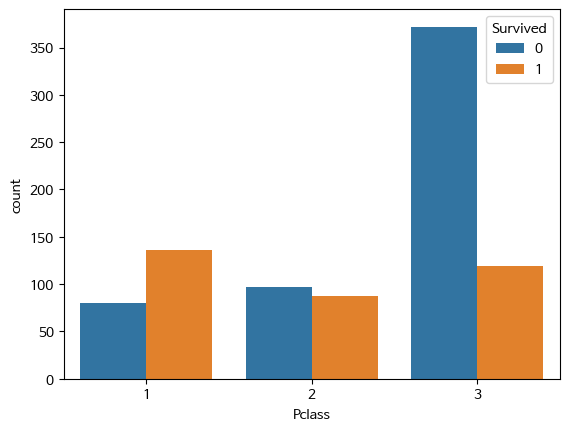

In [71]:
import seaborn as sns
sns.countplot(x='Pclass', hue='Survived',data=titanic)#좌석 등급별 생존자 확인

<Axes: >

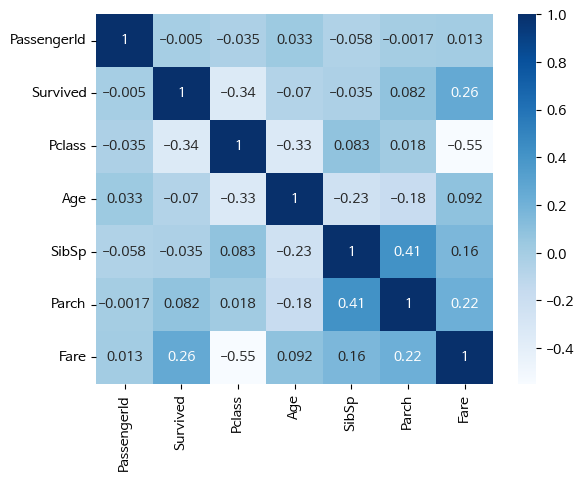

In [79]:
numeric_titanic = titanic.select_dtypes(include=['float64', 'int64'])#상관관계 분석
sns.heatmap(data=numeric_titanic.corr(),annot=True,cmap='Blues')

**연습 문제**

연습 1)

In [82]:
#1
iris=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv')

In [81]:
iris.groupby('Species').max()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [83]:
iris.groupby('Species').min()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [93]:
#2
iris.rename(columns={'SepalLength':'SL','SepalWidth':'SW','PetalLength':'PL','PetalWidth':'PW','Species':'SP'},inplace=True)
iris.head()

,SL,SW,PL,PW,SP
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


연습 2)

In [94]:
import seaborn as sns
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [103]:
#1
tips.sort_values(['total_bill','tip']).head(10)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2
195,7.56,1.44,Male,No,Thur,Lunch,2
218,7.74,1.44,Male,Yes,Sat,Dinner,2
145,8.35,1.50,Female,No,Thur,Lunch,2
135,8.51,1.25,Female,No,Thur,Lunch,2
126,8.52,1.48,Male,No,Thur,Lunch,2


In [105]:
#2
tips.sort_values(['size','tip'],ascending=[False,True]).head(10)

,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.20,Female,No,Thur,Lunch,6
143,27.05,5.00,Female,No,Thur,Lunch,6
156,48.17,5.00,Male,No,Sun,Dinner,6
141,34.30,6.70,Male,No,Thur,Lunch,6
187,30.46,2.00,Male,Yes,Sun,Dinner,5
216,28.15,3.00,Male,Yes,Sat,Dinner,5
142,41.19,5.00,Male,No,Thur,Lunch,5
185,20.69,5.00,Male,No,Sun,Dinner,5
155,29.85,5.14,Female,No,Sun,Dinner,5
153,24.55,2.00,Male,No,Sun,Dinner,4


연습 3)

In [107]:
iris=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
#1
iris.sort_values('SepalWidth',ascending=False)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
15,5.7,4.4,1.5,0.4,setosa
33,5.5,4.2,1.4,0.2,setosa
32,5.2,4.1,1.5,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
...,...,...,...,...,...
87,6.3,2.3,4.4,1.3,versicolor
62,6.0,2.2,4.0,1.0,versicolor
68,6.2,2.2,4.5,1.5,versicolor
119,6.0,2.2,5.0,1.5,virginica


In [109]:
#2


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: >

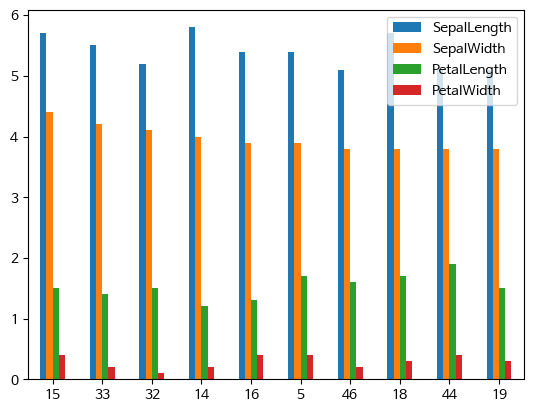

In [161]:
iris_sorted=iris.sort_values('SepalWidth',ascending=False).head(10)
iris_sorted.plot(kind='bar',rot=0)

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

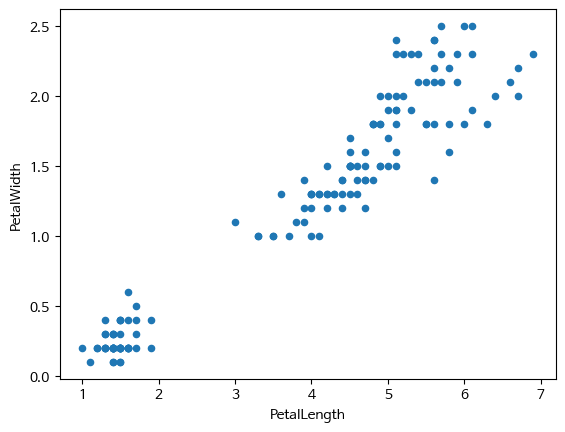

In [113]:
#3
iris.plot(kind='scatter',x='PetalLength',y='PetalWidth')

연습 4)

In [114]:
#1
titanic=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
titanic.loc[:,['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [121]:
#2
titanic.loc[:,['Parch','Survived']].groupby('Parch').mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [127]:
#3
titanic=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
titanic.drop(['Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)
titanic.groupby(['Pclass','Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

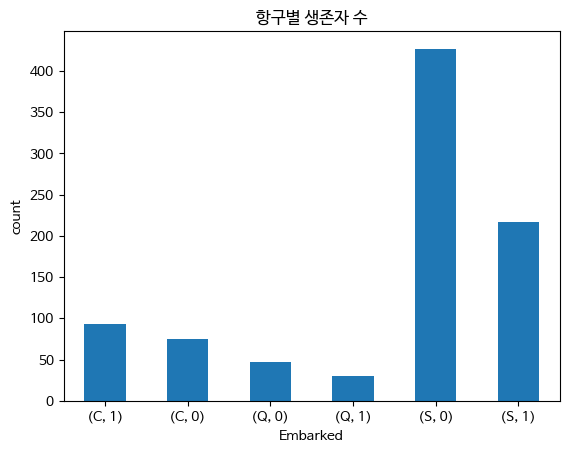

In [181]:
#4
titanic=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
titanic=titanic.groupby(['Embarked']).Survived.value_counts()
titanic.plot(kind='bar',rot=0)
plt.title('항구별 생존자 수')
plt.xlabel('Embarked')
plt.ylabel('count')
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

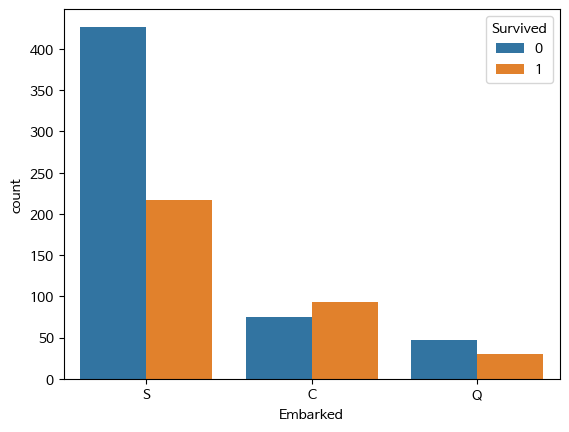

In [184]:
import seaborn as sns
titanic=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
sns.countplot(x='Embarked', hue='Survived',data=titanic)#좌석 등급별 생존자 확인